In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

### 1. Data Preprocessing

#### Load The DataSet

In [2]:
df = pd.read_csv("C:\\Users\\lenovo\\Desktop\\ML\\uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#### Desribing the Data

In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


#### Drop unnecessary columns

In [5]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

#### Handle missing values

In [6]:
df.dropna(inplace=True)

#### Convert date/time fields

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

#### Define features and target variable

In [8]:
X = df.drop(['fare_amount', 'pickup_datetime'], axis=1)
y = df['fare_amount']

#### Normalize/scale features if necessary

In [9]:
scaler = StandardScaler()
X[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'hour', 'day_of_week', 'passenger_count']] = scaler.fit_transform(X[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'hour', 'day_of_week', 'passenger_count']])

#### Display the first few rows of the preprocessed dataset

In [10]:
X.head(), y.head()

(   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
 0         -0.128712         0.103940          -0.112387          0.117638   
 1         -0.128235         0.102628          -0.112021          0.121627   
 2         -0.129169         0.104253          -0.109570          0.124912   
 3         -0.126641         0.110739          -0.109780          0.129431   
 4         -0.122173         0.104682          -0.110372          0.123235   
 
    passenger_count      hour  day_of_week  
 0        -0.493902  0.845464    -0.024878  
 1        -0.493902  0.998945     0.488749  
 2        -0.493902  1.152425    -1.565757  
 3         0.949109 -0.842820     0.488749  
 4         2.392119  0.538503    -0.024878  ,
 0     7.5
 1     7.7
 2    12.9
 3     5.3
 4    16.0
 Name: fare_amount, dtype: float64)

### 2. Identify Outliers

#### Visualize Data Distribution

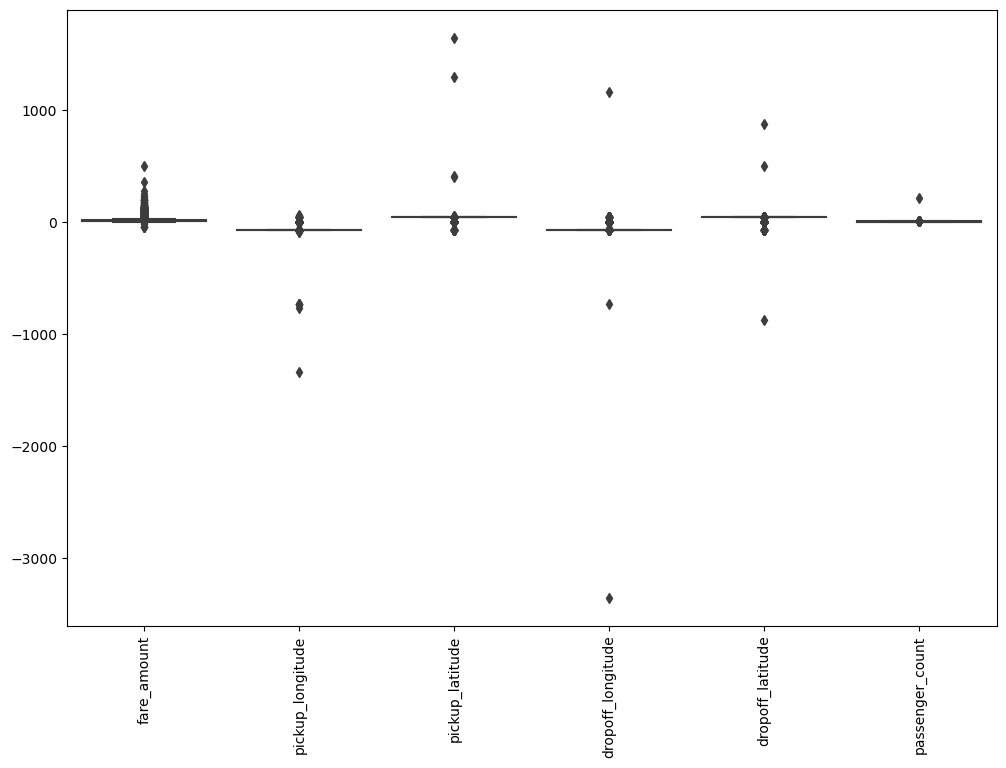

In [11]:
plt.figure(figsize=(12, 8))
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)  
plt.show()

#### Remove outliers based on IQR

In [12]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_no_outliers = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_no_outliers = y[X_no_outliers.index]

#### Display the shape of the data after removing outliers.

In [13]:
X_no_outliers.shape, y_no_outliers.shape

((153778, 7), (153778,))

### 3.Check the Correlation

#### Calculate correlation matrix

In [14]:
correlation_matrix = df.corr()

#### Visualize correlation matrix

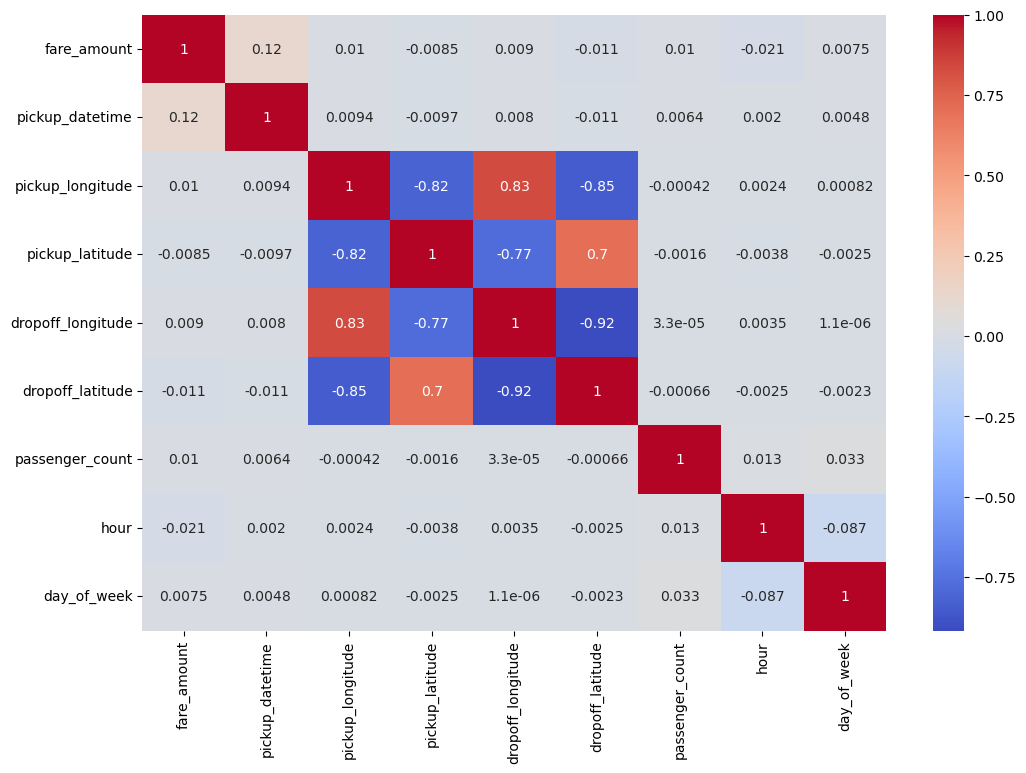

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 4.Implement Linear Regression and Random Forest Regression Models

#### Define features and target variable

In [16]:
X = df.drop(['fare_amount', 'pickup_datetime'], axis=1)
y = df['fare_amount']

#### Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train linear regression model

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

#### Train random forest regression model

#### Check the columns in the DataFrame

In [19]:
print(df.columns)

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day_of_week'],
      dtype='object')


#### Drop columns if they exist

In [20]:
columns_to_drop = ['fare_amount', 'key', 'pickup_datetime']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns_to_drop)

#### Define the target variable

In [21]:
y = df['fare_amount']

#### Proceed with the rest of your code

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initialize and fit the RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#### Predict and evaluate

In [ ]:
y_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

#### Print the evaluation metrics

In [ ]:
print(f"Random Forest Regression - R2: {rf_r2}, RMSE: {rf_rmse}")

### 5.Evaluate the Models

#### Predict and evaluate for linear regression.

In [ ]:
y_pred_linear = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(linear_r2)
print(linear_rmse)

#### Predict and evaluate for random forest regression

In [ ]:
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

#### Compare scores

In [ ]:
print(f"Linear Regression - R2: {linear_r2}, RMSE: {linear_rmse}")
print(f"Random Forest Regression - R2: {rf_r2}, RMSE: {rf_rmse}")